# **3.1 MODEL REGRESI SEDERHANA**

**Membaca data file CSV**

In [ ]:
#menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#memanggil data set lewat gdrive
parth = "/content/gdrive/MyDrive/Machine Learning/Pertemuan3/Praktikum3"

In [ ]:
#membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(parth + "/Data/socr.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


**Melihat informasi umum pada data**

In [ ]:
# mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


**Menghitung statistik deskriptif pada kolom numeric dengan describe**

In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


**Data Pre-processing**

In [ ]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,            #in ->cm
        berat_kg=lambda d: d["berat_kg"] * 0.45359237         #lb ->kg
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


**Membagi dataset untuk Training dan Test**

In [ ]:
from re import X
from sklearn.model_selection import train_test_split

#variabel independent/bebas/fitur
X = df1[["tinggi_cm"]]
#variabel independent/terikat/fitur
y = df1["berat_kg"]

#membagi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7)

#cetak data training
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


**Pemodelan Data: dengan data training**

In [ ]:
from sklearn.linear_model import LinearRegression
#buat object model instan dari class LinearRegression
model = LinearRegression()
#lakukan proses training
model.fit(X_train, y_train)

LinearRegression()

**Evaluasi Model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# prediksi model dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Buat DataFrame kosong
df_resume = pd.DataFrame()

# Assign kolom satu per satu dengan list
df_resume['R2'] = [r2]
df_resume['Koefisien (Kg/cm)'] = [model.coef_[0]]
df_resume['Intersep (Kg)'] = [model.intercept_]
df_resume['MAE (kg)'] = [mae]
df_resume['MSE (kg)'] = [mse]
df_resume['RMSE (kg)'] = [rmse]

df_resume


,R2,Koefisien (Kg/cm),Intersep (Kg),MAE (kg),MSE (kg),RMSE (kg)
0,0.249893,0.551823,-37.657089,3.670411,21.242938,4.609006


**Cetak Persamaan Regresi**

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan Regresi: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan Regresi: y = 0.552 * x + -37.657


**Plot Regresi**

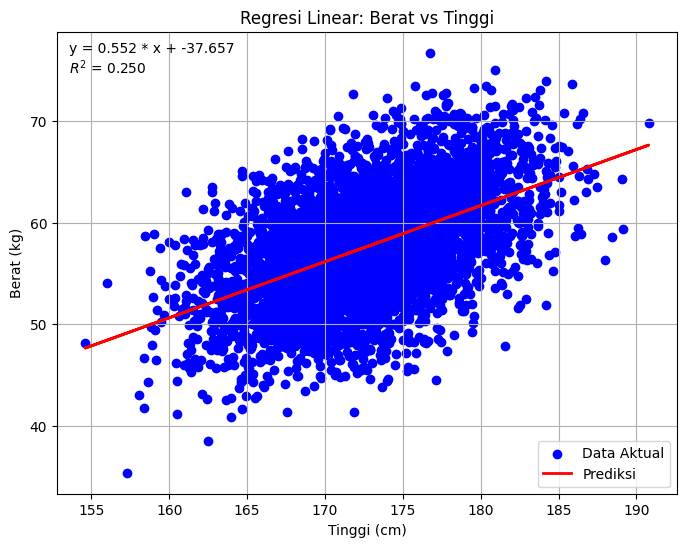

In [ ]:
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

# Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")

# Menampilkan persamaan regresi dan R^2 di plot
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,
    va="top"
)

plt.legend()
plt.grid(True)
plt.show()

plt.show()

In [ ]:
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error/aktual|)), dibatasi 0–100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


# **Data Testing dari Mahasiswa TI2022 "Praktikum Bareng Pak Rojul"**

**Membaca dan Menampilkan Data Berat Mahasiswa TI 2022**

In [ ]:
import pandas as pd

# Kalau file ada di folder "data" di direktori kerja
data = pd.read_csv("/content/gdrive/MyDrive/Machine Learning/Pertemuan3/Praktikum3/Data/berat_TI2022.csv", sep=";")

df_ti2022 = pd.DataFrame(data)
df_ti2022


,No,Nama,tinggi_cm,actual_berat_kg
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Keyla,160,70.3
4,5,Bani,183,65.8


**Membaca dan Menampilkan 5 Baris Pertama Data Berat Mahasiswa TI 2022**

In [ ]:
import pandas as pd

# Langsung baca file dari lokasi di Google Drive
data = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Pertemuan3/Praktikum3/Data/berat_TI2022.csv', sep=';')

# Simpan ke DataFrame dan tampilkan beberapa baris pertama
df_ti2022 = pd.DataFrame(data)
df_ti2022.head()

,No,Nama,tinggi_cm,actual_berat_kg
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Keyla,160,70.3
4,5,Bani,183,65.8


**Menyiapkan Fitur Tinggi Badan untuk Data Testing**

In [ ]:
# ambil x_testing
X_testing = [df_ti2022['tinggi_cm']]
X_testing

[0    168
 1    162
 2    155
 3    160
 4    183
 Name: tinggi_cm, dtype: int64]

**Prediksi Berat Badan dan Perhitungan Error**

In [ ]:
import pandas as pd

# Baca data langsung tanpa path +
data = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Pertemuan3/Praktikum3/Data/berat_TI2022.csv', sep=';')

# Lanjutkan proses prediksi
y_pred = model.predict(data[['tinggi_cm']])
data['prediksi_kg'] = y_pred

# Hitung selisih error
data["Selisih error (kg)"] = data["actual_berat_kg"] - data["prediksi_kg"]

# Tampilkan hasil
data.head()


,No,Nama,tinggi_cm,actual_berat_kg,prediksi_kg,Selisih error (kg)
0,1,Rafa,168,58.5,55.049219,3.450781
1,2,Tiara,162,78.2,51.738280,26.461720
2,3,Tia,155,52.7,47.875517,4.824483
3,4,Keyla,160,70.3,50.634633,19.665367
4,5,Bani,183,65.8,63.326568,2.473432


**Ringkasan Statistik Deskriptif Dataset**

In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


# **3.2 MULTIPLE LINEAR REGRESI**

**Membaca data file CSV**

In [ ]:
import pandas as pd

# Read the CSV file with a comma delimiter
df = pd.read_csv(
    '/content/gdrive/MyDrive/Machine Learning/Pertemuan3/Praktikum3/Data/stunting_wasting_dataset.csv', sep=',',
    skiprows=1,
    header=None,
    names=['Jenis Kelamin', 'Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)', 'Stunting', 'Wasting']
    )

# cetak header data (5 baris data) dari file
df_resume
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


**Menghitung statistik deskriptif pada kolom numeric dengan describe**

In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


**Data Pre-processing**

In [ ]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin":"jk","Umur (bulan)":"umur_bln",
                        "Tinggi Badan (cm)": "tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())

## Laki-laki : 1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki":  1, "Perempuan":0})
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


**Analisis Korelasi**

In [ ]:
# Hitung matriks korelasi
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


**Buat Heatmap Grafik**

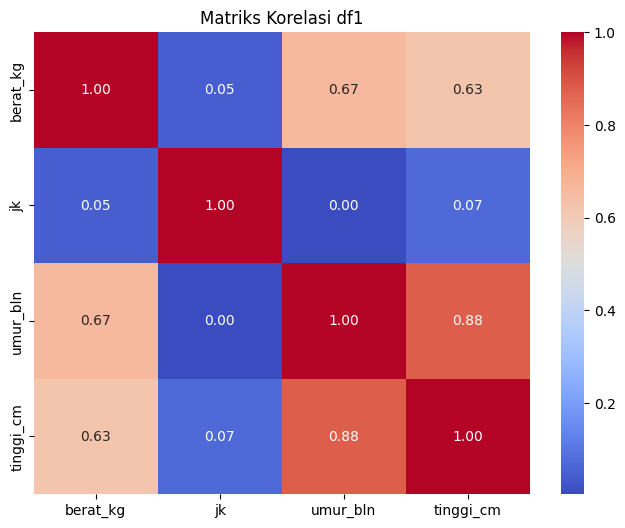

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

**Membagi dataset untuk Training dan Test**

In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan target (y) adalah berat badan, # Variabel dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["umur_bln", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) # random_state supaya hasil konsisten

## Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

## cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train : 80000
Jumlah data test : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


**Pemodelan**

In [ ]:
## Tambahkan konstanta
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


**Pemodelan dengan Pustaka Program OLS**

In [ ]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------') #29
print(model.params)
print('-----------------------------') #29
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

-----------------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
-----------------------------
y = 2.546 + 0.230*x1 + 0.054*x2


**Cetak Informasi Model Regresi OLS**

In [ ]:
# Tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:59:55   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

**Pengujian Model dengan Data Testing**

In [ ]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error| / aktual)), dibatasi 0–100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil.head(4)

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.60,7.00,5.73,-1.27,81.92
80184,8,66.00,12.20,7.96,-4.24,65.25
19864,20,90.00,10.90,12.02,1.12,89.75
76699,13,82.40,9.60,10.00,0.40,95.86
